# Pymaceuticals Inc.
---

### Analysis

- There are 10 treatments used in the study with Capomulin and Ramicane being the most utilized.
- The least utilized in Propriva'
- The distribution between sex of the mice was relatively even at 51% and 49% respectively
- Looking at the Tumor Volumes in the Box Plot you can easily see that with Capomulin and Ramicane the overall Tumor Volumes were lower as compare to the other treatmens.
- In mouse b128, over an almost 40 day period the tumor volume decreased substantially.
- According the Linear Regression model the Correlation Coefficient of 0.84, meaning there is a high correlation between weight of the mice and size of the tumor.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of mice.
total_mice = mouse_study_df["Mouse ID"].nunique()
total_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep="first")
duplicate_mice_ID = mouse_study_df.loc[duplicate_mice, "Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df[mouse_study_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study_df[mouse_study_df["Mouse ID"] != "g989"]
# cleaned_df.head()

In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
dr_mean = cleaned_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
dr_median = cleaned_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
dr_var = cleaned_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
dr_std = cleaned_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
dr_sem = cleaned_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({"Mean Tumor Volume": dr_mean,
                                      "Median Tumor Volume": dr_median,
                                      "Tumor Volume Variance": dr_var,
                                      "Tumor Volume Std Dev": dr_std,
                                      "Tumor Volume Std Error": dr_sem
                                     })
summary_statistics_df

C:\Users\idriv\AppData\Local\Temp\ipykernel_13192\2689575919.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dr_mean = cleaned_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
C:\Users\idriv\AppData\Local\Temp\ipykernel_13192\2689575919.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dr_median = cleaned_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
C:\Users\idriv\AppData\Local\Temp\ipykernel_13192\2689575919.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

cleaned_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
drug_counts = cleaned_df["Drug Regimen"].value_counts()
drug_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

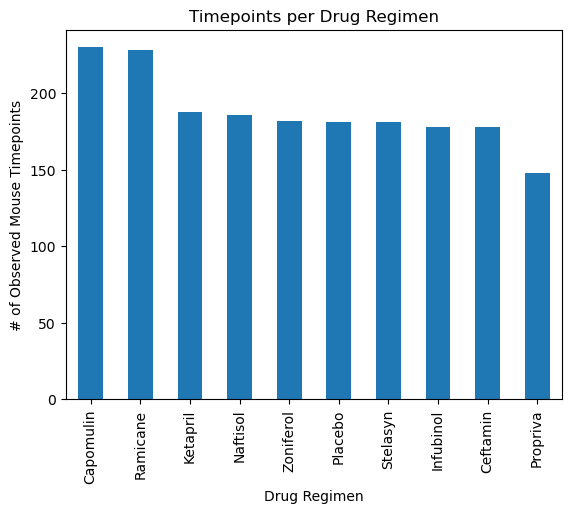

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts.plot(kind="bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.title("Timepoints per Drug Regimen")
plt.show()

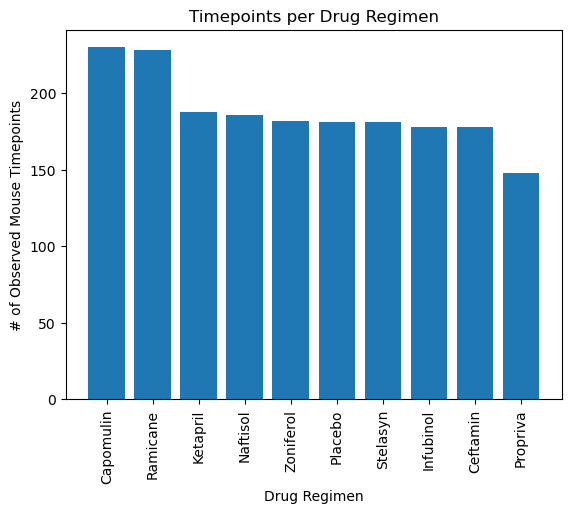

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(drug_counts.index.values, drug_counts, align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Timepoints per Drug Regimen")
    
plt.show()

In [14]:
mouse_sex = cleaned_df["Sex"].value_counts()
mouse_sex
# sex_counts = mouse_sex["Sex"].count()
# sex_counts


Male      958
Female    922
Name: Sex, dtype: int64

In [15]:
# cleaned_df["Sex"].value_counts()

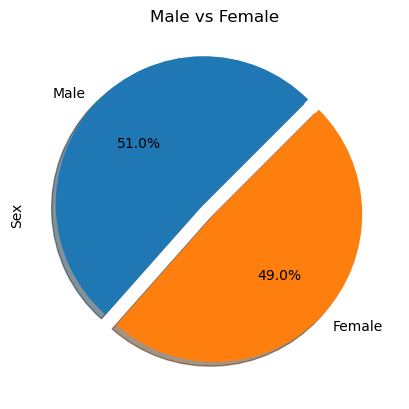

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# cleaned_df
explode = (0.1,0)
pie_plot = mouse_sex.plot.pie(autopct="%1.1f%%", title="Male vs Female", explode=explode, shadow=True, startangle=45)
plt.show()

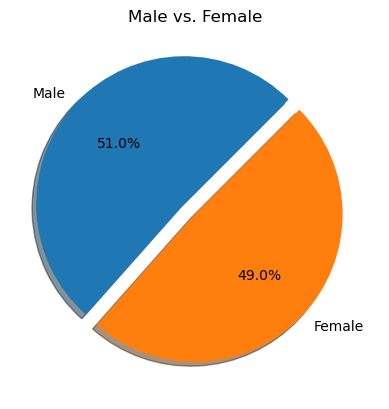

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex, labels=mouse_sex.index.values, autopct="%1.1f%%", explode=explode, shadow=True, startangle=45)
plt.title("Male vs. Female")

plt.show()

## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_per_mouse = cleaned_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint_per_mouse_df = pd.DataFrame(max_timepoint_per_mouse)
max_timepoint_per_mouse_df = max_timepoint_per_mouse_df.reset_index()
max_timepoint_per_mouse_df


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [74]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_maxtimepoint = pd.merge(max_timepoint_per_mouse_df, cleaned_df, how="outer", on=["Mouse ID", "Timepoint"])
merged_maxtimepoint.head(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [75]:

# capomulin_df = merged_maxtimepoint[merged_maxtimepoint["Drug Regimen"] == "Capomulin"]
# ramicane_df = merged_maxtimepoint[merged_maxtimepoint["Drug Regimen"] == "Ramicane"]
# infubinol_df = merged_maxtimepoint[merged_maxtimepoint["Drug Regimen"] == "Infubinol"]
# ceftamin_df = merged_maxtimepoint[merged_maxtimepoint["Drug Regimen"] == "Ceftamin"]


In [76]:
# capomulin_df["Tumor Volume (mm3)"]

In [77]:
# cap_lowerq = capomulin_df["Tumor Volume (mm3)"].quantile(0.25)
# cap_upperq = capomulin_df["Tumor Volume (mm3)"].quantile(0.75)
# cap_iqr = cap_upperq - cap_lowerq
# cap_iqr

# cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
# cap_upper_bound = cap_upperq + (1.5*cap_iqr)
# cap_lower_bound
# cap_upper_bound

In [78]:
# Get the last timepoint per mouse ID and put in a new dataframe

final_tumor_volume = merged_maxtimepoint.groupby(["Drug Regimen", "Mouse ID"]).last()[["Timepoint", "Tumor Volume (mm3)"]]
final_tumor_volume_df = final_tumor_volume.reset_index()
final_tumor_volume_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,40,38.379726
1,Capomulin,b742,40,38.255627
2,Capomulin,f966,15,32.623003
3,Capomulin,g288,40,36.356851
4,Capomulin,g316,40,45.565821
...,...,...,...,...
243,Zoniferol,q633,40,68.498639
244,Zoniferol,s337,40,56.994816
245,Zoniferol,w140,0,45.000000
246,Zoniferol,w575,40,64.938406


In [112]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
    
    final_tumor_volume = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == x,  "Tumor Volume (mm3)"]
    tumor_vol_data.append(final_tumor_volume)
    

    quartiles = last_timepoint.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = upperq-lowerq
    iqr = round(iqr,2)

    #print(f"The final tumor volume for {x} is: {tumor_vol_data}")
    print(f"The upper quartile of {x} is: {upperq}")
    print(f"The lower quartile of {x} is: {lowerq}")
    print(f"The interquartile range of {x} is: {iqr}")


    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    lower_outliers = round(final_tumor_volume.loc[(final_tumor_volume < lower_bound)],0)
    upper_outliers = round(final_tumor_volume.loc[(final_tumor_volume > upper_bound)],2)
    
    print(f"The number of lower outliers of {x} are: {lower_outliers.count()}")
    print(f"The number of upper outliers of {x} are: {upper_outliers.count()}")
    print("------------------------------------------------------------")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #last_timepoint = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    # print(tumor_vol_data)    

The upper quartile of Capomulin is: 60.28
The lower quartile of Capomulin is: 48.15
The interquartile range of Capomulin is: 12.13
Values below 29.955 could be outliers.
Values above 78.475 could be outliers.
The number of lower outliers of Capomulin are: 2
The number of upper outliers of Capomulin are: 0
------------------------------------------------------------
The upper quartile of Ramicane is: 60.28
The lower quartile of Ramicane is: 48.15
The interquartile range of Ramicane is: 12.13
Values below 29.955 could be outliers.
Values above 78.475 could be outliers.
The number of lower outliers of Ramicane are: 1
The number of upper outliers of Ramicane are: 0
------------------------------------------------------------
The upper quartile of Infubinol is: 60.28
The lower quartile of Infubinol is: 48.15
The interquartile range of Infubinol is: 12.13
Values below 29.955 could be outliers.
Values above 78.475 could be outliers.
The number of lower outliers of Infubinol are: 0
The number 

In [162]:
# final_tumor_volume_df

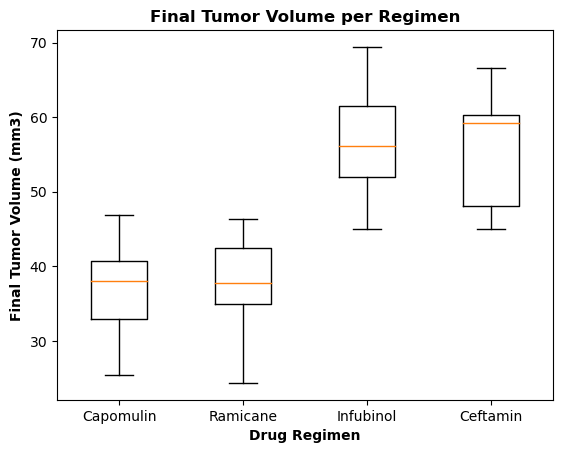

In [161]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_volume_df = plt.subplots()
final_tumor_volume_df.boxplot(tumor_vol_data, labels=treatments)
plt.xlabel("Drug Regimen", fontweight="bold")
plt.ylabel("Final Tumor Volume (mm3)", fontweight="bold")
plt.title("Final Tumor Volume per Regimen", fontweight="bold")
plt.show()


## Line and Scatter Plots

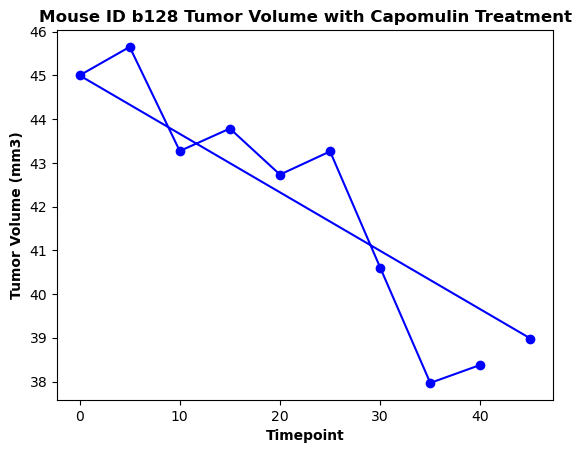

In [198]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = merged_maxtimepoint[merged_maxtimepoint["Drug Regimen"] == "Capomulin"]

mouse_id = "b128"
mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_id]
#mouse_df
#mouse_df.plot("Timepoint", "Tumor Volume (mm3)")

plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"], marker="o", color="b")
plt.xlabel("Timepoint", fontweight="bold")
plt.ylabel("Tumor Volume (mm3)", fontweight="bold")
plt.title("Mouse ID b128 Tumor Volume with Capomulin Treatment", fontweight="bold")
plt.show()

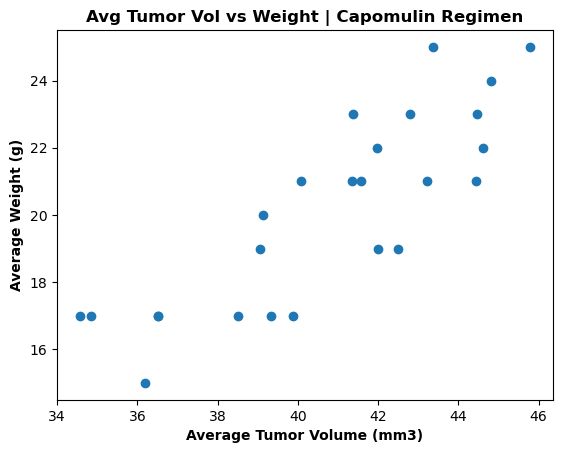

In [216]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()


plt.scatter(avg_tumor_vol, avg_weight)
plt.xlabel("Average Tumor Volume (mm3)", fontweight="bold")
plt.ylabel("Average Weight (g)", fontweight="bold")
plt.title("Avg Tumor Vol vs Weight | Capomulin Regimen", fontweight="bold")
plt.show()


## Correlation and Regression

The Correlation coefficient is:  0.84


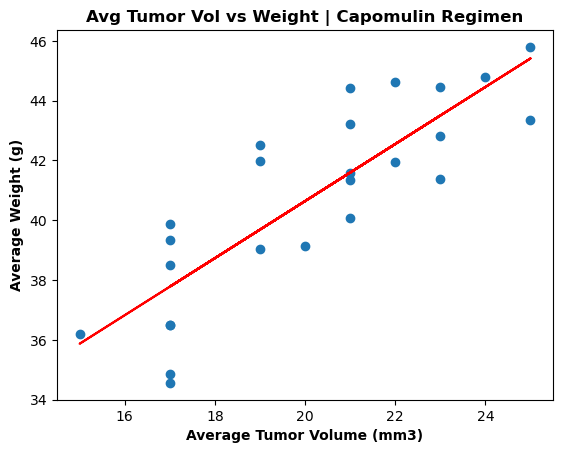

In [227]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_value = avg_weight
y_value = avg_tumor_vol

correlation = round(st.pearsonr(x_value, y_value)[0],2)
print(f"The Correlation coefficient is:  {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
reg_line = m_avg_tumor * avg_weight + int_avg_tumor

plt.scatter(x_value, y_value)
plt.plot(avg_weight, reg_line, color="r")
plt.xlabel("Average Tumor Volume (mm3)", fontweight="bold")
plt.ylabel("Average Weight (g)", fontweight="bold")
plt.title("Avg Tumor Vol vs Weight | Capomulin Regimen", fontweight="bold")
plt.show()